In [1]:
import os
import pandas as pd
import numpy as np
import random as rd
from collections import Counter
import matplotlib.pyplot as plt




In [15]:
# Iterate over each .csv file and load it into a DataFrame
agent_dataframes, collective_dataframes, market_dataframes = [], [], []
#use os.listdir to get the list of files in the directory
#use this below: C:\Users\ELhuillier\OneDrive - Harrisburg University\Computational Devecology\Sim_results\First trial
path = 'C:\\Users\\ELhuillier\\OneDrive - Harrisburg University\\Computational Devecology\\Sim_results\\GeneticTastes\\'
for file in os.listdir(path):
    df = pd.read_csv(path+file)
    if 'agent' in file:
        agent_dataframes.append(df)
    elif 'collective' in file:
        collective_dataframes.append(df)
    elif 'market' in file:
        market_dataframes.append(df)


In [19]:
# Concatenate the DataFrames into a single DataFrame
for dataframes in ['agent_dataframes', 'collective_dataframes', 'market_dataframes']:   
    if 'agent' in dataframes:
        try:
            combined_df = pd.concat(agent_dataframes, ignore_index=True)
            combined_df.to_csv(path+'combined_agents.csv')
        except:
            pass
    elif 'collective' in dataframes:
        try:
            combined_df = pd.concat(collective_dataframes, ignore_index=True)
            combined_df.to_csv(path+'combined_collectives.csv')
        except:
            pass
    elif 'market' in dataframes:
        try:
            combined_df = pd.concat(market_dataframes, ignore_index=True)
            combined_df.to_csv(path+'combined_market.csv')
        except:
            pass


In [20]:
#Load market

market_df = pd.read_csv(path+'combined_market.csv')

market_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'products', 'tastes_group_youth_mid',
       'tastes_group_mid_old', 'tastes_group_youth_old',
       'best_products_top_10', 'best_products_rest', 'time', 'sim_n'],
      dtype='object')

In [5]:
# For each time step in the market collective data, calculate the mean and std deviation
def mean_std_market(market_df):

    # Create df for mean and std deviation for market columns: best_products_'tastes_group_youth_mid', 'tastes_group_mid_old', 'tastes_group_youth_old', 'best_products_top_10', 'best_products_rest'
    mean_df = pd.DataFrame(columns=['time', 'best_products_youth_mid', 'best_products_mid_old', 'best_products_youth_old', 'best_products_top_10', 'best_products_rest'])
    std_dev_df = pd.DataFrame(columns=['time', 'best_products_youth_mid', 'best_products_mid_old', 'best_products_youth_old', 'best_products_top_10', 'best_products_rest'])

    # Create a list of the columns to iterate over
    columns = ['tastes_group_youth_mid', 'tastes_group_mid_old','tastes_group_youth_old', 'best_products_top_10', 'best_products_rest']
    time_steps = market_df['time'].unique()

    for column in columns:
        mean_values = []
        std_dev_values = []
        for time in time_steps:
            mean_values.append(market_df[market_df['time'] == time][column].mean())
            std_dev_values.append(market_df[market_df['time'] == time][column].std())
        mean_df[column] = mean_values
        std_dev_df[column] = std_dev_values

    return mean_df, std_dev_df

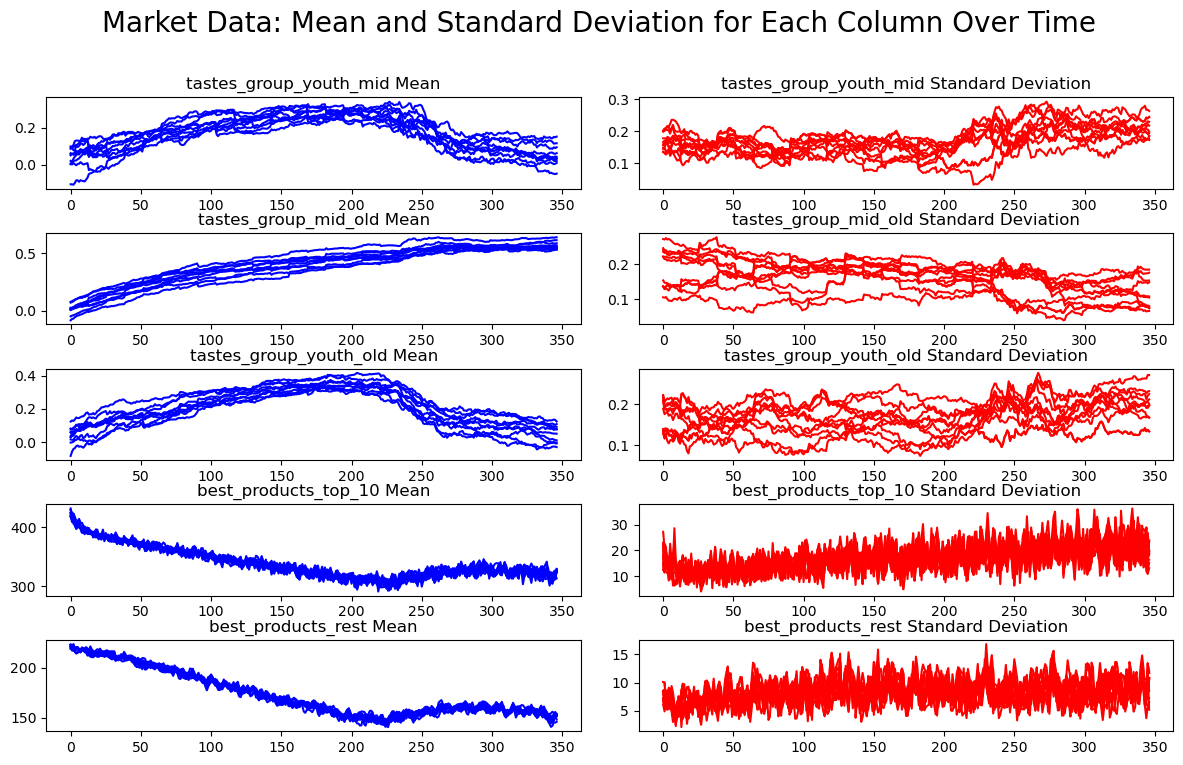

In [11]:
#Plot the time series of mean and standard deviation, the std dev should be in the same figure as mean and in a different color
columns = ['tastes_group_youth_mid', 'tastes_group_mid_old','tastes_group_youth_old', 'best_products_top_10', 'best_products_rest']
time_steps = market_df['time'].unique()

bootstrap_simdata = False

fig, ax = plt.subplots(5, 2, figsize=(12, 8))
fig.suptitle('Market Data: Mean and Standard Deviation for Each Column Over Time', fontsize=20)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
for i, column in enumerate(columns):
    if bootstrap_simdata
        for j in range(10):
            samples = rd.sample(range(2,50), 10)
            sample_df = []
            for sample in samples:
                sample_df.append(market_df[market_df.sim_n == sample])
            sample_df = pd.concat(sample_df, ignore_index=True)
            mean_df, std_dev_df = mean_std_market(sample_df)
            ax[i, 0].plot(time_steps, mean_df[column], label='Mean', color='blue')
            ax[i, 1].plot(time_steps, std_dev_df[column], label='Standard Deviation', color='red')
    else:
        mean_df, std_dev_df = mean_std_market(market_df)
        ax[i, 0].plot(time_steps, mean_df[column], label='Mean', color='blue')
        ax[i, 1].plot(time_steps, std_dev_df[column], label='Standard Deviation', color='red')
    ax[i, 0].set_title(f'{column} Mean')
    ax[i, 1].plot(time_steps, std_dev_df[column], label='Standard Deviation', color='red')
    ax[i, 1].set_title(f'{column} Standard Deviation')
plt.show()

In [12]:
#Print avg and std dev for tastes_group_youth_mid, tastes_group_mid_old, tastes_group_youth_old in the last time step
last_time_step = market_df['time'].max()
print(f'Last time step: {last_time_step}')
print(f'Average tastes_group_youth_mid: {market_df[market_df.time == last_time_step].tastes_group_youth_mid.mean()}')
print(f'Standard deviation tastes_group_youth_mid: {market_df[market_df.time == last_time_step].tastes_group_youth_mid.std()}')
print(f'Average tastes_group_mid_old: {market_df[market_df.time == last_time_step].tastes_group_mid_old.mean()}')
print(f'Standard deviation tastes_group_mid_old: {market_df[market_df.time == last_time_step].tastes_group_mid_old.std()}')
print(f'Average tastes_group_youth_old: {market_df[market_df.time == last_time_step].tastes_group_youth_old.mean()}')
print(f'Standard deviation tastes_group_youth_old: {market_df[market_df.time == last_time_step].tastes_group_youth_old.std()}')


Last time step: 346
Average tastes_group_youth_mid: 0.08711075688042959
Standard deviation tastes_group_youth_mid: 0.20596518088526503
Average tastes_group_mid_old: 0.5765791679825535
Standard deviation tastes_group_mid_old: 0.11172924246247055
Average tastes_group_youth_old: 0.08017141610627872
Standard deviation tastes_group_youth_old: 0.19750403512484072


In [25]:
#Give me the average tastes for individuals in youth, middle, and old age groups 
#Look at every individual in the last time step and calculate the average tastes for each age group (<20, 20-40, >40)

#Load individual agent data
agent_df = pd.read_csv(path+'combined_agents.csv')

#Get average of tastes (average value per each taste factor) for each age group
#Create a new column for age group
agent_df['age_group'] = pd.cut(agent_df['age'], bins=[0, 20, 40, 100], labels=['youth', 'middle', 'old'])

#Get the average of tastes for each age group
age_groups = agent_df['age_group'].unique()
#check length of taste vector in the tastes variable and then create a list of tastes
len_tastes = len(agent_df['tastes'][0].split(','))
tastes = ['taste'+str(i) for i in range(1, len_tastes+1)]

#Create a new column for each taste factor
for taste in tastes:
    value = agent_df['tastes'].apply(lambda x: x.split(',')[int(taste[-1])-1])
    #clean value from the brackets and convert to float
    #use regex to remove brackets
    value = value.str.replace('[','').str.replace(']','').astype(float)
    value = float(value) 
    agent_df[taste] = value


C:\Users\ELhuillier\AppData\Local\Temp\ipykernel_8880\19801663.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  value = value.str.replace('[','').str.replace(']','').astype(float)


TypeError: cannot convert the series to <class 'float'>

In [24]:
#Clean taste 

,Unnamed: 0.1,Unnamed: 0,id,age,generation,tastes,familiar_ties,friend_ties,acquaintance_ties,dependent,...,taste21,taste22,taste23,taste24,taste25,taste26,taste27,taste28,taste29,taste30
0,0,0,0,35,0,"[0.021669795448120865, -0.0662306181316378, -0...","[922, 524, 717]","[523, 1256, 659, 1282, 169, 679, 756, 607, 187...","[127, 3, 958, 914, 875, 2, 93, 100, 704, 547, ...",True,...,[0.021669795448120865,-0.0662306181316378,-0.31173310651067215,0.21384754268892317,-0.2960525207985692,0.1028168068244165,0.2746901522504663,-0.11695442859352254,0.10253340232218269,-0.022335968813807148]
1,1,1,1,32,1,"[0.1114195853519511, -0.2386971931458769, -0.1...","[815, 162, 1500]","[315, 288, 900, 1119, 1198, 1165, 1074, 55, 86...","[127, 3, 958, 914, 875, 2, 93, 100, 704, 547, ...",True,...,[0.1114195853519511,-0.2386971931458769,-0.12148362572870515,0.23257942104690352,0.24240380959563743,-0.39616971565331804,-0.3724883354224536,-0.5241685750700915,-0.09090430070573115,-0.3049978586719519]
2,2,2,2,60,0,"[0.21097735749365248, 0.17770661306990268, -0....","[786, 1500]","[1384, 1255, 777, 992, 103, 231, 75, 862, 36, ...","[127, 3, 958, 914, 875, 2, 100, 704, 547, 0, 1...",False,...,[0.21097735749365248,0.17770661306990268,-0.1282143272521997,-0.055700678249913434,0.020362658134228703,0.024134950134067325,0.15331178220197003,-0.28792523645948237,-0.3292504652544044,-0.258290672196782]
3,3,3,3,109,0,"[0.08915413931505203, 0.3791663471793146, -0.1...","[689, 1500, 1500]","[1018, 932, 1192, 316, 1496, 365, 1155, 991, 7...","[127, 3, 958, 914, 875, 2, 93, 100, 704, 547, ...",False,...,[0.08915413931505203,0.3791663471793146,-0.14738353789943062,-0.05394031415518485,-0.3017126447957329,0.24335720244283732,-0.22453758621483805,-0.08231285351216226,0.36512280997150176,0.17853534515543745]
4,4,4,4,127,0,"[0.35804277583067307, 0.25532734310623617, 0.1...",[],"[1000, 809, 964, 398, 1091, 1208, 1199, 1141, ...","[127, 3, 958, 914, 875, 2, 100, 704, 547, 0, 1...",False,...,[0.35804277583067307,0.25532734310623617,0.1464220825263223,-0.21610179756472855,-0.03073007456229768,0.2517770984203354,0.09336120687647981,-0.46582914629041833,-0.3989143408771838,0.10006174776467938]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109010,109010,2176,1500,1,1,"[0.05891187214703715, -0.6573267166903614, 0.7...","[909, 1500]","[117, 991, 364, 1250, 307, 687, 399, 1321, 464...","[1327, 179, 1227, 952, 1258, 1149, 1344, 1222,...",True,...,[0.05891187214703715,-0.6573267166903614,0.7082817801238299,0.45427877624156604,0.6055743711998458,-0.10409400059341856,0.6673635976923866,0.6069071735476015,-0.48377624401999597,-0.7439025323738526]
109011,109011,2177,1500,1,1,"[-0.8160036531195987, 0.8898700288831931, -0.1...","[918, 1121, 1500]","[117, 991, 364, 1250, 307, 687, 399, 1321, 464...","[1327, 179, 1227, 952, 1258, 1149, 1344, 1222,...",True,...,[-0.8160036531195987,0.8898700288831931,-0.11049824837327504,0.2625363421451987,0.11484800275905904,-0.19243769026253776,0.6873754781697685,0.8152190649865751,-0.5275477947836271,0.9928345459801746]
109012,109012,2178,1500,1,1,"[0.4873194742151823, 0.8727175041267037, 0.100...",[24],"[986, 1312, 1500, 1500, 1387, 1352, 920, 857, ...","[127, 3, 958, 914, 875, 2, 114, 100, 704, 547,...",True,...,[0.4873194742151823,0.8727175041267037,0.10061798332968319,-0.8965572120282193,-0.3565278496285149,0.42588330137244834,0.2944533123124684,-0.2004883440901577,-0.41656375574592186,0.3190525199454677]
109013,109013,2179,1500,0,1,"[0.9385023786039524, -0.21964815389591652, -0....","[1295, 636, 1500]","[986, 1312, 1500, 1500, 1387, 1352, 920, 857, ...","[127, 3, 958, 914, 875, 2, 114, 100, 704, 547,...",True,...,[0.9385023786039524,-0.21964815389591652,-0.44513463513493856,-0.9919045077163804,0.41124797101016974,0.12179669525715076,-0.3558532151676701,-0.09326648955220285,-0.595687745606281,-0.5073618464382534]
